# 이미지 특징을 추출하는 오토인코더

In [10]:
from tensorflow.keras.datasets impoㅁrt mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 불러옵니다.
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same',
                       input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분이 이어집니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 8)          

In [12]:
# UpSampling2D
# 데이터의 해상도를 높이거나 이미지의 크기를 확대하는 과정
# 주로 픽셀을 추가하여 이미지의 크기 늘리기,
# 기존의 정보를 기반으로 새로운 픽셀 값을 생성

# 예시:
# 업샘플링을 사용하여 작은 이미지를 큰 화면에 맞게 조정할 때,
# 이미지가 픽셀화되거나 선명도가 떨어질 수 있습니다.
# 이 경우, 딥러닝 모델을 사용하여 더 자연스럽고 선명한 이미지를 생성할 수 있습니다.


# keras.layers.UpSampling2D(
#     size=(2, 2), data_format=None, interpolation="nearest", **kwargs
# )


# Example
# >>> input_shape = (2, 2, 1, 3)
# >>> x = np.arange(np.prod(input_shape)).reshape(input_shape)
# >>> print(x)
# [[[[ 0  1  2]]
#   [[ 3  4  5]]]
#  [[[ 6  7  8]]
#   [[ 9 10 11]]]]
# >>> y = keras.layers.UpSampling2D(size=(1, 2))(x)
# >>> print(y)
# [[[[ 0  1  2]
#    [ 0  1  2]]
#   [[ 3  4  5]
#    [ 3  4  5]]]
#  [[[ 6  7  8]
#    [ 6  7  8]]
#   [[ 9 10 11]
#    [ 9 10 11]]]]

>Conv2D (Convolutional Layer)

역할:

특징 추출: Conv2D 레이어는 이미지의 지역적인 패턴을 학습하는 데 사용됩니다. 필터(커널)를 사용하여 입력 이미지에 대한 컨볼루션 연산을 수행하며, 이를 통해 다양한 특징(예: 엣지, 텍스처 등)을 추출합니다.
파라미터 학습: Conv2D는 학습 가능한 필터를 가지고 있어, 학습 과정에서 이러한 필터가 최적화됩니다.

타이밍:

입력 이미지 처리 초기: Conv2D 레이어는 네트워크의 초기 단계에서 입력 이미지에 적용됩니다. 초기 단계에서 이미지를 처리하여 기본적인 특징을 추출합니다.
다층 구성: Conv2D 레이어는 여러 층으로 쌓여서 복잡한 특징을 학습합니다. 예를 들어, 첫 번째 Conv2D 레이어는 기본적인 엣지와 텍스처를 학습하고, 이후 층은 이러한 기본적인 특징을 조합하여 더 복잡한 패턴을 학습합니다.

>MaxPooling2D (Max Pooling Layer)

역할:

차원 축소: MaxPooling2D 레이어는 입력 특성 맵에서 가장 큰 값만을 선택하여 차원을 축소합니다. 이를 통해 계산량을 줄이고, 위치 불변성을 강화합니다.
정보 요약: 필터를 적용하여 입력 데이터의 가장 중요한 정보를 요약하고, 잡음을 줄이며, 모델의 일반화 능력을 향상시킵니다.

타이밍:

Convolution 뒤: MaxPooling2D 레이어는 일반적으로 Conv2D 레이어 뒤에 배치되어, 특징 맵의 차원을 줄이면서 지역적인 특징을 요약합니다.
특징 추출 후: Conv2D 레이어로부터 얻은 특징 맵을 처리하여, 고수준의 패턴 인식을 위한 차원 축소를 수행합니다. 이는 네트워크의 깊이와 복잡성을 줄이는 데 도움을 줍니다

Epoch 1/50
469/469 [==============================] - 30s 61ms/step - loss: 0.2107 - val_loss: 0.1373
Epoch 2/50
469/469 [==============================] - 28s 60ms/step - loss: 0.1263 - val_loss: 0.1180
Epoch 3/50
469/469 [==============================] - 28s 59ms/step - loss: 0.1148 - val_loss: 0.1103
Epoch 4/50
469/469 [==============================] - 28s 59ms/step - loss: 0.1091 - val_loss: 0.1060
Epoch 5/50
469/469 [==============================] - 28s 59ms/step - loss: 0.1053 - val_loss: 0.1025
Epoch 6/50
469/469 [==============================] - 28s 60ms/step - loss: 0.1021 - val_loss: 0.0997
Epoch 7/50
469/469 [==============================] - 27s 59ms/step - loss: 0.0997 - val_loss: 0.0974
Epoch 8/50
469/469 [==============================] - 28s 60ms/step - loss: 0.0978 - val_loss: 0.0956
Epoch 9/50
469/469 [==============================] - 28s 60ms/step - loss: 0.0961 - val_loss: 0.0943
Epoch 10/50
469/469 [==============================] - 29s 61ms/step - loss: 0.094

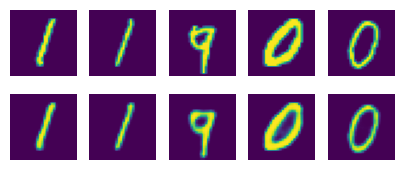

In [11]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()

>주요 차이점 요약

목적:

오토인코더: 데이터를 압축하고 복원하는 데 사용됩니다. 데이터의 저차원 표현을 학습하여 재구성합니다.

GAN: 새로운 데이터를 생성하는 데 사용됩니다. 생성자와 판별자가 서로 경쟁하여 현실적인 데이터를 생성합니다.

구조:

오토인코더: 인코더와 디코더로 구성되어 있으며, 입력 데이터와 복원된 데이터 사이의 차이를 줄이기 위해 학습합니다.

GAN: 생성자와 판별자 두 개의 네트워크가 서로 경쟁하며 학습합니다. 생성자는 가짜 데이터를 만들고, 판별자는 이를 진짜와 구분합니다.